In [1]:
from eda_imports import *

In [2]:
%time df = pd.read_csv('./crime_csv_all_years.csv')

CPU times: user 759 ms, sys: 75 ms, total: 834 ms
Wall time: 836 ms


In [3]:
ndf = df.query('YEAR < 2017') # 2017 not over yet

In [4]:
ndf.YEAR.unique().shape

(14,)

In [5]:
ndf.shape

(512830, 10)

In [6]:
# very slow

# def extract_datetime(row):
#     row = row[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']].fillna(0)
#     return datetime.datetime(
#         int(row.YEAR),
#         int(row.MONTH),
#         int(row.DAY),
#         int(row.HOUR),
#         int(row.MINUTE))

# %time ndf['datetime'] = ndf.apply(extract_datetime, axis=1)

In [7]:
ndf.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Residential/Other,2003,4,29,20.0,0.0,4XX E 10TH AVE,Mount Pleasant,493070.39,5456538.13
1,Theft of Vehicle,2003,2,10,23.0,0.0,40XX W 34TH AVE,Dunbar-Southlands,485891.03,5454311.79
2,Theft from Vehicle,2003,10,3,13.0,30.0,1XX E HASTINGS ST,Central Business District,492571.65,5458738.74
3,Theft from Vehicle,2003,10,10,18.0,10.0,1XX E HASTINGS ST,Central Business District,492571.65,5458738.74
4,Theft from Vehicle,2003,12,1,10.0,0.0,1XX E HASTINGS ST,Central Business District,492571.65,5458738.74


In [23]:
ndf.NEIGHBOURHOOD.value_counts()

Central Business District    106063
West End                     39994 
Fairview                     31323 
Mount Pleasant               29459 
Grandview-Woodland           26298 
Kitsilano                    25889 
Renfrew-Collingwood          25819 
Kensington-Cedar Cottage     24292 
Strathcona                   20115 
Hastings-Sunrise             17564 
Sunset                       16989 
Marpole                      12686 
Riley Park                   12124 
Victoria-Fraserview          10494 
Killarney                    10203 
Oakridge                     7771  
Dunbar-Southlands            7532  
Kerrisdale                   7241  
Arbutus Ridge                5866  
West Point Grey              5665  
Shaughnessy                  5197  
South Cambie                 5034  
Stanley Park                 3693  
Musqueam                     528   
Name: NEIGHBOURHOOD, dtype: int64

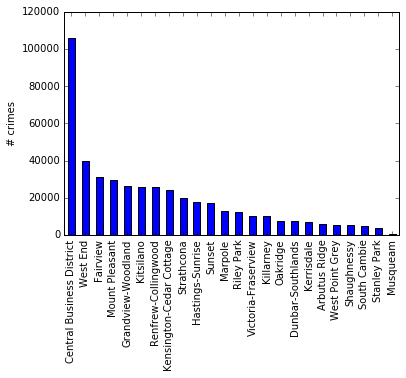

In [24]:
ax = ndf.NEIGHBOURHOOD.value_counts().plot.bar()
ax.set_ylabel('# crimes')

More rigorously, the number should be normalized by the area of the district.

# Number of crimes over the year

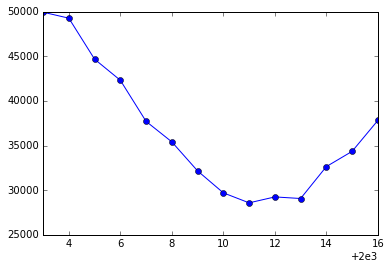

In [9]:
ndf.YEAR.value_counts().sort_index().plot(marker='o')

There seem to be upper trend. :(

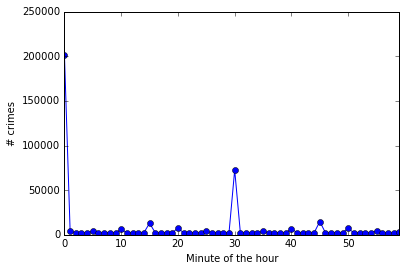

In [10]:
ax = ndf.MINUTE.value_counts().sort_index().plot(marker='o')
ax.set_xlabel('Minute of the hour')
ax.set_ylabel('# crimes')

The 0 and 30 are probably artifical since people tend to round minutes, similar effects apply to quarters.

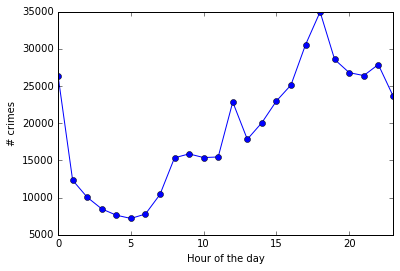

In [11]:
ax = ndf.HOUR.value_counts().sort_index().plot(marker='o')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('# crimes')

Early morning has lower crime rate, in contrast to the evening time till midnight

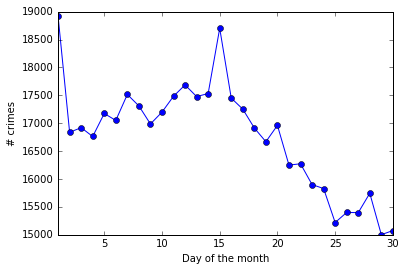

In [12]:
# not every month has 31st day
ax= ndf.query("DAY <31").DAY.value_counts().sort_index().plot(marker='o')
ax.set_xlabel('Day of the month')
ax.set_ylabel('# crimes')

The middle of a month has high crime rate

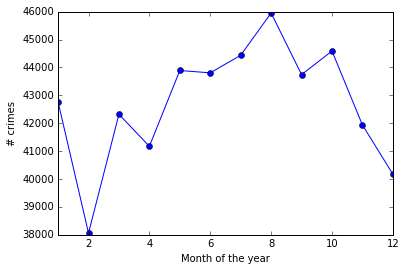

In [13]:
ax = ndf.MONTH.value_counts().sort_index().plot(marker='o')
ax.set_xlabel('Month of the year')
ax.set_ylabel('# crimes')

The difference is relatively small, but Feb (could be due to shorter month) and Dec (could be due to Christmas) have relatively lower crime rate

The same plot by year

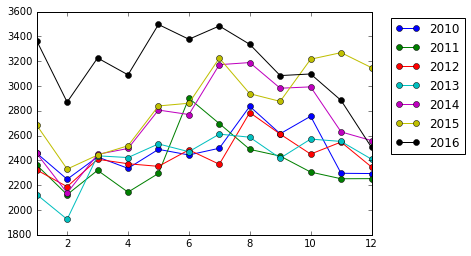

In [14]:
for i in range(2010, 2017):
    ndf.query('YEAR == {0}'.format(i)).MONTH.value_counts().sort_index().plot(marker='o', label=i)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Distribution of crime types

In [15]:
ndf.TYPE.value_counts()

Theft from Vehicle                                        166749
Mischief                                                  67831 
Break and Enter Residential/Other                         59558 
Offence Against a Person                                  52556 
Other Theft                                               49301 
Theft of Vehicle                                          37666 
Break and Enter Commercial                                32735 
Theft of Bicycle                                          24746 
Vehicle Collision or Pedestrian Struck (with Injury)      21230 
Vehicle Collision or Pedestrian Struck (with Fatality)    249   
Homicide                                                  209   
Name: TYPE, dtype: int64

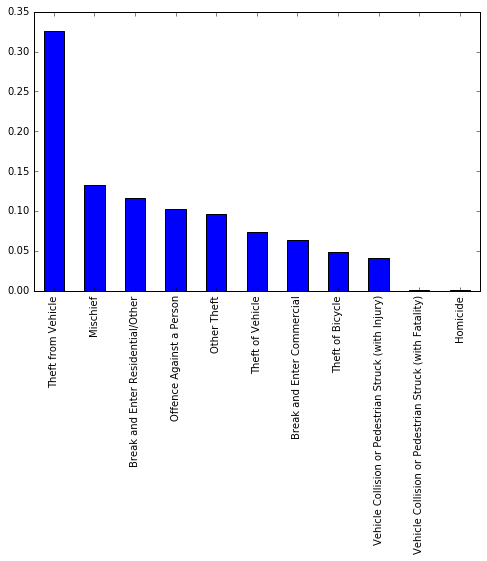

In [16]:
fig = plt.figure(figsize=(8, 5))
(ndf.TYPE.value_counts() / ndf.shape[0]).plot.bar()